<a href="https://colab.research.google.com/github/sharunsha/sharunsha/blob/main/Foreign_Direct_Investment_Analytics_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Foreign Direct Investment Analytics**

In [71]:
# Importing required Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [72]:
FDI = pd.read_csv('/content/FDI data (1).csv')
FDI.style.set_caption("Amount in us$ Millions").format(precision=2)

,Sector,2000-01,2001-02,2002-03,2003-04,2004-05,2005-06,2006-07,2007-08,2008-09,2009-10,2010-11,2011-12,2012-13,2013-14,2014-15,2015-16,2016-17
0,METALLURGICAL INDUSTRIES,22.69,14.14,36.61,8.11,200.38,149.13,169.94,1175.75,959.94,419.88,1098.14,1786.14,1466.23,567.63,359.34,456.31,1440.18
1,MINING,1.32,6.52,10.06,23.48,9.92,7.40,6.62,444.36,34.16,174.40,79.51,142.65,57.89,12.73,684.39,520.67,55.75
2,POWER,89.42,757.44,59.11,27.09,43.37,72.69,157.15,988.68,907.66,1271.79,1271.77,1652.38,535.68,1066.08,707.04,868.80,1112.98
3,NON-CONVENTIONAL ENERGY,0.00,0.00,1.70,4.14,1.27,1.35,2.44,58.82,125.88,622.52,214.40,452.17,1106.52,414.25,615.95,776.51,783.57
4,COAL PRODUCTION,0.00,0.00,0.00,0.04,0.00,9.14,1.30,14.08,0.22,0.00,0.00,0.00,0.00,2.96,0.00,0.00,0.00
5,PETROLEUM & NATURAL GAS,9.35,211.07,56.78,80.64,102.78,12.09,87.71,1405.04,349.29,265.53,556.43,2029.98,214.80,112.23,1079.02,103.02,180.40
6,BOILERS AND STEAM GENERATING PLANTS,0.00,0.00,0.00,0.04,0.54,0.00,3.31,1.51,0.00,3.96,0.63,31.79,20.05,0.17,1.33,77.91,53.91
7,PRIME MOVER (OTHER THAN ELECTRICAL GENERATORS),0.00,0.00,0.00,0.00,2.66,0.74,25.57,40.53,74.88,39.50,166.44,313.75,184.60,212.78,230.70,159.13,286.88
8,ELECTRICAL EQUIPMENTS,79.76,65.76,34.71,73.20,97.40,39.50,76.85,653.74,417.35,728.27,153.90,566.39,195.87,134.31,574.83,444.88,2230.69
9,COMPUTER SOFTWARE & HARDWARE,228.39,419.39,314.24,368.32,527.90,1359.97,2613.33,1382.25,1543.34,871.86,779.81,796.35,485.96,1126.27,2296.04,5904.36,3651.71


In [73]:
FDI.columns

Index(['Sector', '2000-01', '2001-02', '2002-03', '2003-04', '2004-05',
       '2005-06', '2006-07', '2007-08', '2008-09', '2009-10', '2010-11',
       '2011-12', '2012-13', '2013-14', '2014-15', '2015-16', '2016-17'],
      dtype='object')

In [74]:
Year = ['2000-01', '2001-02', '2002-03', '2003-04', '2004-05',
       '2005-06', '2006-07', '2007-08', '2008-09', '2009-10', '2010-11',
       '2011-12', '2012-13', '2013-14', '2014-15', '2015-16', '2016-17']
Sectors = ['Sector']

In [75]:
#Extracting Detailed Information using info function
FDI.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63 entries, 0 to 62
Data columns (total 18 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Sector   63 non-null     object 
 1   2000-01  63 non-null     float64
 2   2001-02  63 non-null     float64
 3   2002-03  63 non-null     float64
 4   2003-04  63 non-null     float64
 5   2004-05  63 non-null     float64
 6   2005-06  63 non-null     float64
 7   2006-07  63 non-null     float64
 8   2007-08  63 non-null     float64
 9   2008-09  63 non-null     float64
 10  2009-10  63 non-null     float64
 11  2010-11  63 non-null     float64
 12  2011-12  63 non-null     float64
 13  2012-13  63 non-null     float64
 14  2013-14  63 non-null     float64
 15  2014-15  63 non-null     float64
 16  2015-16  63 non-null     float64
 17  2016-17  63 non-null     float64
dtypes: float64(17), object(1)
memory usage: 9.0+ KB


In [76]:
#Checking the null Values as a crucial step in data pre-processing
FDI.isnull().sum()

Sector     0
2000-01    0
2001-02    0
2002-03    0
2003-04    0
2004-05    0
2005-06    0
2006-07    0
2007-08    0
2008-09    0
2009-10    0
2010-11    0
2011-12    0
2012-13    0
2013-14    0
2014-15    0
2015-16    0
2016-17    0
dtype: int64

In [77]:
#Creating Average Currency Exchange Rate list  :- Reference (RBI website)
Rates = [45.68,47.69,48.39,45.95,44.93,44.27,45.24,40.26,45.99,
         47.44,45.56,47.92,54.40,60.50,61.14,65.46,67.07]

# **Converting American '$' to Indian '₹':**

In [78]:
#Creating a function to Convert FDI's value from USD to INR
def multiply_columns(df, col_list, num):
    for col in col_list:
        df[col] = df[col] * Rates[col_list.index(col)]/10
    return df

In [79]:
FDI_InUSD=FDI.copy()
FDI_02 = multiply_columns(FDI, Year, Rates)

In [80]:
#FDI INFLOWS (Amount in ₹ Crores)
FDI_02.style.set_caption("FDI INFLOWS (Amount in ₹ Crores)").format(precision=2)

,Sector,2000-01,2001-02,2002-03,2003-04,2004-05,2005-06,2006-07,2007-08,2008-09,2009-10,2010-11,2011-12,2012-13,2013-14,2014-15,2015-16,2016-17
0,METALLURGICAL INDUSTRIES,103.65,67.43,177.16,37.27,900.31,660.20,768.81,4733.57,4414.76,1991.91,5003.13,8559.18,7976.29,3434.16,2197.00,2987.01,9659.29
1,MINING,6.03,31.09,48.68,107.89,44.57,32.76,29.95,1788.99,157.10,827.35,362.25,683.58,314.92,77.02,4184.36,3408.31,373.92
2,POWER,408.47,3612.23,286.03,124.48,194.86,321.80,710.95,3980.43,4174.33,6033.37,5794.18,7918.20,2914.10,6449.78,4322.84,5687.16,7464.76
3,NON-CONVENTIONAL ENERGY,0.00,0.00,8.23,19.02,5.71,5.98,11.04,236.81,578.92,2953.23,976.81,2166.80,6019.47,2506.21,3765.92,5083.03,5255.40
4,COAL PRODUCTION,0.00,0.00,0.00,0.18,0.00,40.46,5.88,56.69,1.01,0.00,0.00,0.00,0.00,17.91,0.00,0.00,0.00
5,PETROLEUM & NATURAL GAS,42.71,1006.59,274.76,370.54,461.79,53.52,396.80,5656.69,1606.38,1259.67,2535.10,9727.66,1168.51,678.99,6597.13,674.37,1209.94
6,BOILERS AND STEAM GENERATING PLANTS,0.00,0.00,0.00,0.18,2.43,0.00,14.97,6.08,0.00,18.79,2.87,152.34,109.07,1.03,8.13,510.00,361.57
7,PRIME MOVER (OTHER THAN ELECTRICAL GENERATORS),0.00,0.00,0.00,0.00,11.95,3.28,115.68,163.17,344.37,187.39,758.30,1503.49,1004.22,1287.32,1410.50,1041.66,1924.10
8,ELECTRICAL EQUIPMENTS,364.34,313.61,167.96,336.35,437.62,174.87,347.67,2631.96,1919.39,3454.91,701.17,2714.14,1065.53,812.58,3514.51,2912.18,14961.24
9,COMPUTER SOFTWARE & HARDWARE,1043.29,2000.07,1520.61,1692.43,2371.85,6020.59,11822.70,5564.94,7097.82,4136.10,3552.81,3816.11,2643.62,6813.93,14037.99,38649.94,24492.02


In [81]:
# Unpivoting melt Dataframe
melt = pd.melt(FDI_InUSD, id_vars = Sectors, value_vars = Year, var_name='Year',
    value_name='FDI(US$ Million)',ignore_index=True)
melt

,Sector,Year,FDI(US$ Million)
0,METALLURGICAL INDUSTRIES,2000-01,22.69
1,MINING,2000-01,1.32
2,POWER,2000-01,89.42
3,NON-CONVENTIONAL ENERGY,2000-01,0.00
4,COAL PRODUCTION,2000-01,0.00
...,...,...,...
1066,PRINTING OF BOOKS (INCLUDING LITHO PRINTING IN...,2016-17,53.17
1067,COIR,2016-17,0.00
1068,CONSTRUCTION (INFRASTRUCTURE) ACTIVITIES,2016-17,1860.73
1069,"CONSTRUCTION DEVELOPMENT: Townships, housing, ...",2016-17,105.14


In [82]:
#Unpivoting melt01 Dataframe
melt01 = pd.melt(FDI_02, id_vars = Sectors, value_vars = Year, var_name='Year',
    value_name='FDI(₹ Crores)',ignore_index=True)
melt01=round(melt01,2)
melt01

,Sector,Year,FDI(₹ Crores)
0,METALLURGICAL INDUSTRIES,2000-01,103.65
1,MINING,2000-01,6.03
2,POWER,2000-01,408.47
3,NON-CONVENTIONAL ENERGY,2000-01,0.00
4,COAL PRODUCTION,2000-01,0.00
...,...,...,...
1066,PRINTING OF BOOKS (INCLUDING LITHO PRINTING IN...,2016-17,356.61
1067,COIR,2016-17,0.00
1068,CONSTRUCTION (INFRASTRUCTURE) ACTIVITIES,2016-17,12479.92
1069,"CONSTRUCTION DEVELOPMENT: Townships, housing, ...",2016-17,705.17


In [83]:
# Merging the FDI(US$ Million) column of melt Dataframe into melto1 Dataframe
Merged=melt01.merge(melt,how='left')
Merged

,Sector,Year,FDI(₹ Crores),FDI(US$ Million)
0,METALLURGICAL INDUSTRIES,2000-01,103.65,22.69
1,MINING,2000-01,6.03,1.32
2,POWER,2000-01,408.47,89.42
3,NON-CONVENTIONAL ENERGY,2000-01,0.00,0.00
4,COAL PRODUCTION,2000-01,0.00,0.00
...,...,...,...,...
1066,PRINTING OF BOOKS (INCLUDING LITHO PRINTING IN...,2016-17,356.61,53.17
1067,COIR,2016-17,0.00,0.00
1068,CONSTRUCTION (INFRASTRUCTURE) ACTIVITIES,2016-17,12479.92,1860.73
1069,"CONSTRUCTION DEVELOPMENT: Townships, housing, ...",2016-17,705.17,105.14


In [84]:
#Sorting the Sectors and Year columns
Sorted = Merged.sort_values(['Sector','Year'], ignore_index=True)
Sorted

,Sector,Year,FDI(₹ Crores),FDI(US$ Million)
0,AGRICULTURAL MACHINERY,2000-01,16.63,3.64
1,AGRICULTURAL MACHINERY,2001-02,4.96,1.04
2,AGRICULTURAL MACHINERY,2002-03,65.23,13.48
3,AGRICULTURAL MACHINERY,2003-04,218.45,47.54
4,AGRICULTURAL MACHINERY,2004-05,0.00,0.00
...,...,...,...,...
1066,VEGETABLE OILS AND VANASPATI,2012-13,589.64,108.39
1067,VEGETABLE OILS AND VANASPATI,2013-14,130.38,21.55
1068,VEGETABLE OILS AND VANASPATI,2014-15,906.95,148.34
1069,VEGETABLE OILS AND VANASPATI,2015-16,224.00,34.22


In [85]:
print("\nStats for Sectors\n",'-'*65, sep='')
print(pd.DataFrame(Sorted.groupby('Sector').describe().loc[:,:]).transpose())


Stats for Sectors
-----------------------------------------------------------------
Sector                  AGRICULTURAL MACHINERY  AGRICULTURE SERVICES  \
FDI(₹ Crores)    count               17.000000             17.000000   
                 mean               139.573529            568.894118   
                 std                172.900782           1370.805206   
                 min                  0.000000              2.710000   
                 25%                 13.270000             53.280000   
                 50%                 65.230000            200.010000   
                 75%                218.450000            512.620000   
                 max                519.030000           5798.210000   
FDI(US$ Million) count               17.000000             17.000000   
                 mean                26.423529            112.985294   
                 std                 32.712807            289.004756   
                 min                  0.000000     

In [86]:
#Replacing some Long values of Sector Column to Short form
Sorted = Sorted[['Sector','FDI(₹ Crores)', 'FDI(US$ Million)'
                 ,]].replace(["CONSTRUCTION DEVELOPMENT: Townships, housing, built-up infrastructure and construction-development projects"
                              ,"SERVICES SECTOR (Fin.,Banking,Insurance,Non Fin/Business,Outsourcing,R&D,Courier,Tech. Testing and Analysis, Other)"
                              ,'TEA AND COFFEE (PROCESSING & WAREHOUSING COFFEE & RUBBER)']
                             ,["CONSTRUCTION DEVELOPMENT","SERVICES SECTOR",'TEA AND COFFEE'])

# **Sector-wise Total FDI 2000-2017:**

In [87]:
#Grouping by Sector column to find Total FDI Inflow per Sector from FY2000-01 to FY2016-17
Sectorwise_fdi = Sorted.groupby('Sector').sum()
Sectorwise_fdi.sort_values(by='FDI(US$ Million)',ascending=False)

,FDI(₹ Crores),FDI(US$ Million)
Sector,,
SERVICES SECTOR,316347.59,59476.49
COMPUTER SOFTWARE & HARDWARE,137276.82,24669.49
CONSTRUCTION DEVELOPMENT,115185.97,24293.09
TELECOMMUNICATIONS,130966.04,23946.01
AUTOMOBILE INDUSTRY,92622.66,16673.92
...,...,...
PHOTOGRAPHIC RAW FILM AND PAPER,278.37,67.28
COAL PRODUCTION,122.13,27.74
"MATHEMATICAL,SURVEYING AND DRAWING INSTRUMENTS",41.61,7.98


# **Visualisation:**

<Axes: title={'center': 'SECTOR_WISE FDI INFLOWS'}, xlabel='Sector', ylabel='FDI(₹ Crores)'>

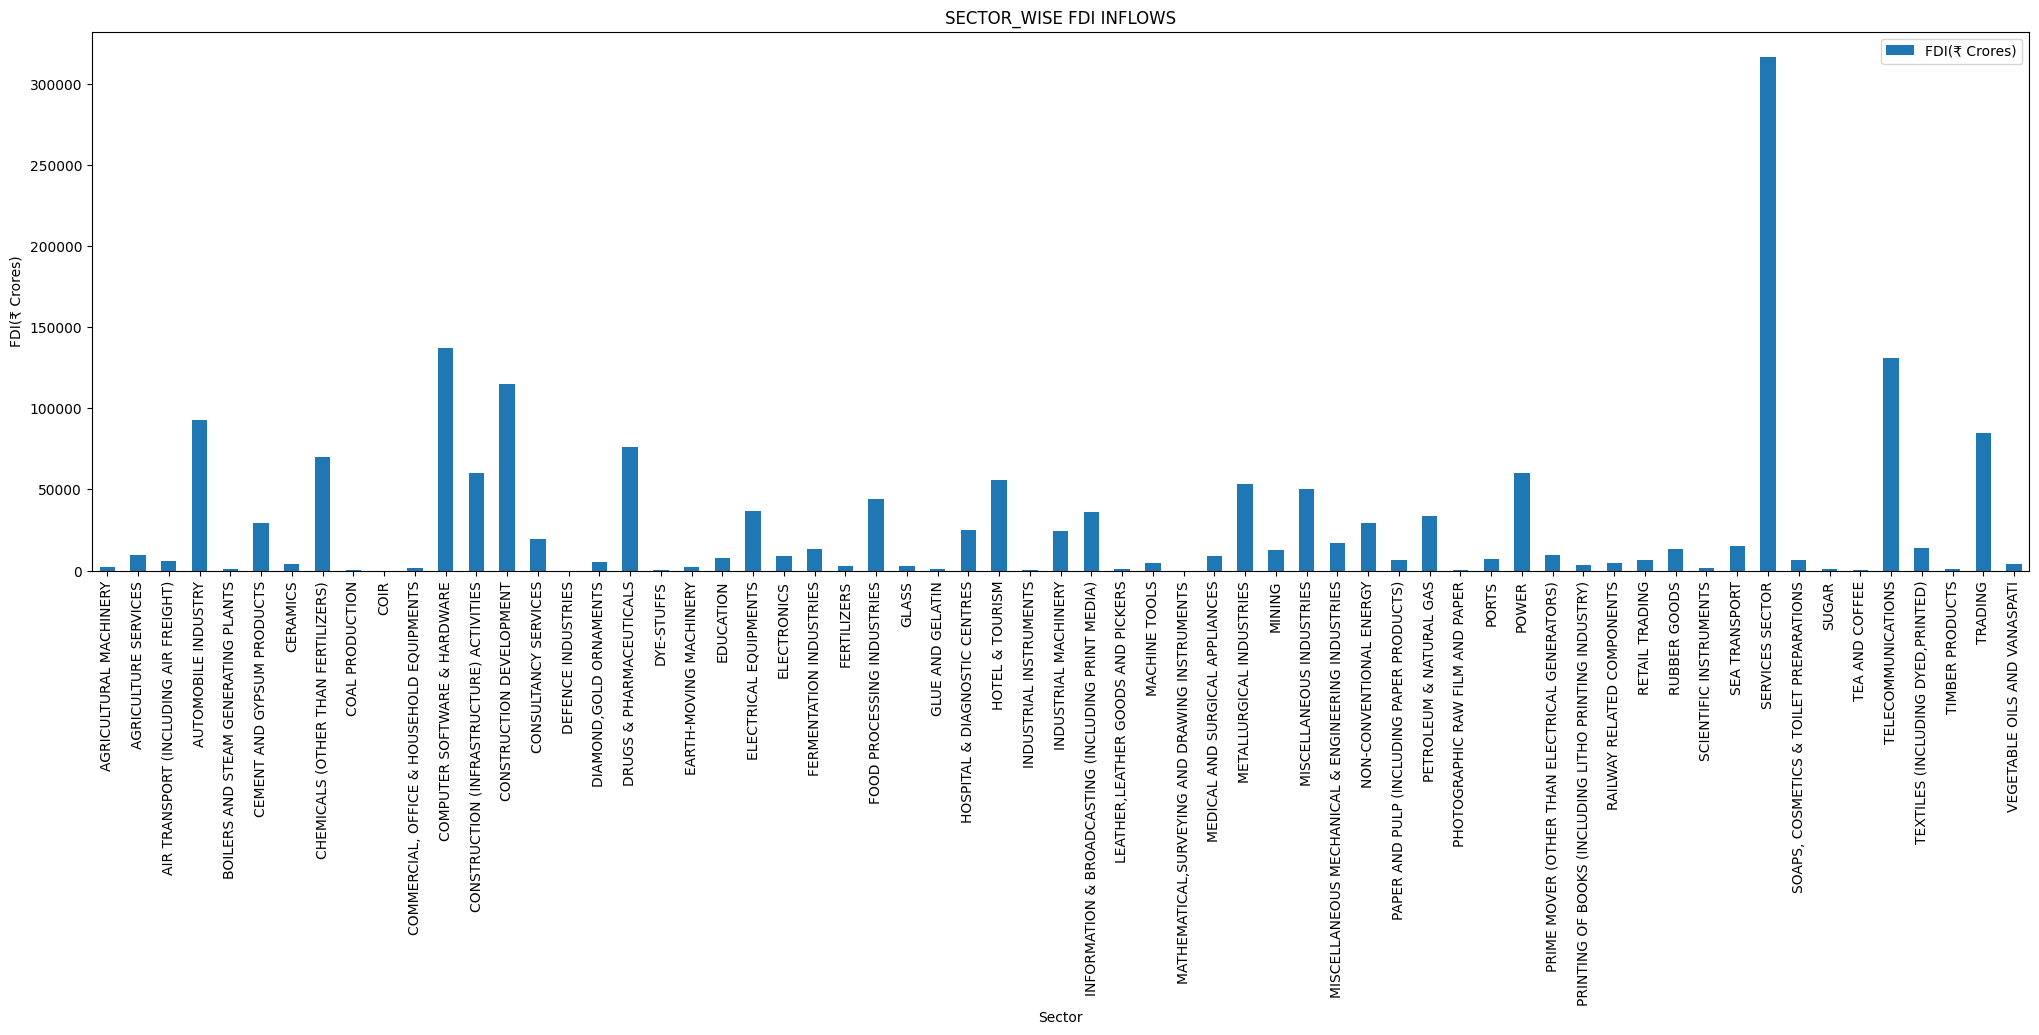

In [88]:
Sectorwise_fdi.plot(kind='bar',y='FDI(₹ Crores)',figsize = (25,7), legend= True, title='SECTOR_WISE FDI INFLOWS',ylabel='FDI(₹ Crores)')


# **Best & Worst Performing Sectors:**
### TOP 10 SECTORS

In [89]:
#Top 10 and bottom 10 sectors
Top_10_Sectors = Sectorwise_fdi.nlargest(10,['FDI(₹ Crores)'])

In [90]:
#Calculating percentage-wise FDI share among top 10 sectors and among all sectors
Total_fdi = round(melt01['FDI(₹ Crores)'].sum(),2)
Sum = Top_10_Sectors['FDI(₹ Crores)'].sum()
Top_10_Sectors['In %age'] = round(Top_10_Sectors['FDI(₹ Crores)']/Sum*100,2)
Top_10_Sectors['%age to Total Inflows'] = round((Top_10_Sectors['FDI(₹ Crores)']/Total_fdi)*100,2)
Top_10_Sectors

,FDI(₹ Crores),FDI(US$ Million),In %age,%age to Total Inflows
Sector,,,,
SERVICES SECTOR,316347.59,59476.49,27.66,17.65
COMPUTER SOFTWARE & HARDWARE,137276.82,24669.49,12.00,7.66
TELECOMMUNICATIONS,130966.04,23946.01,11.45,7.31
CONSTRUCTION DEVELOPMENT,115185.97,24293.09,10.07,6.43
AUTOMOBILE INDUSTRY,92622.66,16673.92,8.10,5.17
TRADING,84487.83,14210.88,7.39,4.72
DRUGS & PHARMACEUTICALS,76377.64,14706.90,6.68,4.26
CHEMICALS (OTHER THAN FERTILIZERS),70031.18,13293.09,6.12,3.91
POWER,60397.97,11589.13,5.28,3.37


# **Visualisation:**

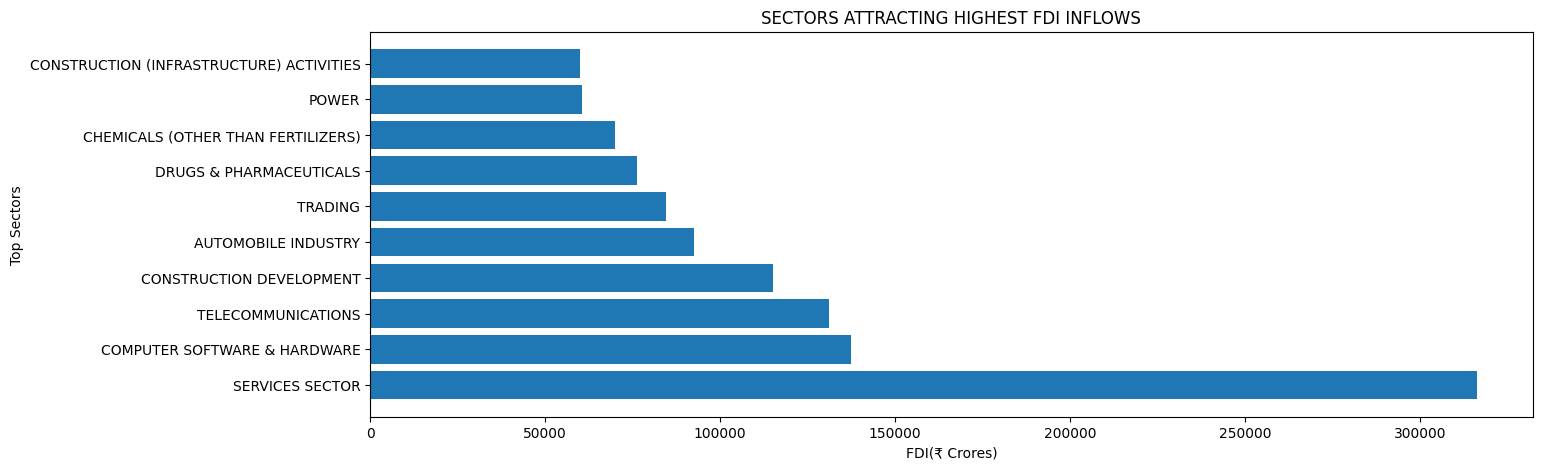

In [91]:
##Creating bar chart to visualise Total FDI inflow in top 10 sectors using Matplotlib

plt.figure(figsize=(15,5))
plt.barh(Top_10_Sectors.index,Top_10_Sectors['FDI(₹ Crores)'])
plt.title('SECTORS ATTRACTING HIGHEST FDI INFLOWS')
plt.xlabel('FDI(₹ Crores)')
plt.ylabel('Top Sectors')
plt.show()

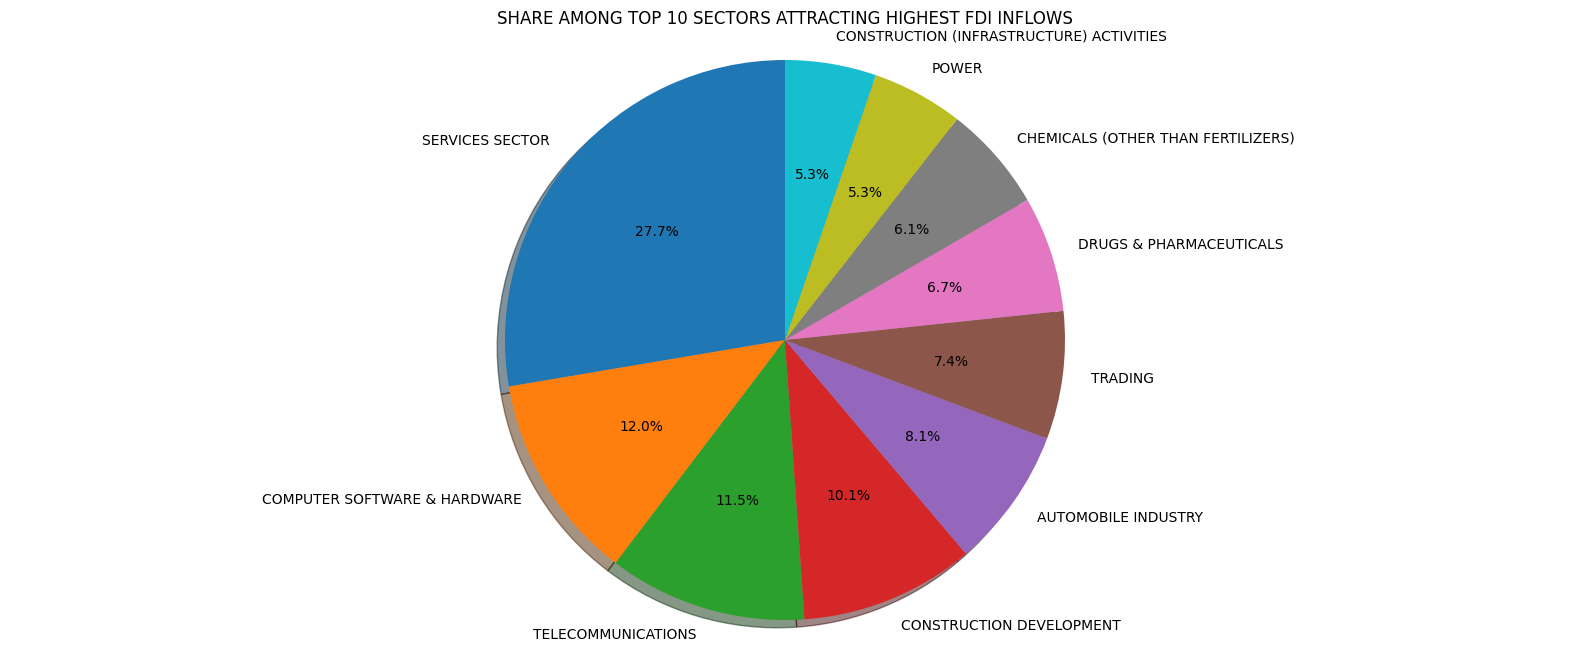

In [92]:
#Creating pie chart to visualise percentage share of FDI among top 10 sectors using Matplotlib

plt.figure(figsize=(20,8))
plt.pie(Top_10_Sectors['FDI(₹ Crores)'],labels=Top_10_Sectors.index,autopct='%1.1f%%',shadow=True,startangle=90)
plt.axis('equal')
plt.title('SHARE AMONG TOP 10 SECTORS ATTRACTING HIGHEST FDI INFLOWS')
plt.show()

From the above Chart, we can understand that Service Sector Managed to Attract highest FDI which was ₹316347.59Cr greater than any other Sector and among top 10 Sectors it has 27.7% share and among all it has 17.65%.

# **BOTTOM 5 SECTORS**

In [93]:
#Calculating share among Bottom sectors and as a whole
Bottom_5_Sectors = Sectorwise_fdi.nsmallest(5,['FDI(₹ Crores)'])
Sum = Bottom_5_Sectors['FDI(₹ Crores)'].sum()
Bottom_5_Sectors['In %age'] = round(Bottom_5_Sectors['FDI(₹ Crores)']/Sum*100,2)
Bottom_5_Sectors['%age to Total Inflows'] = round((Bottom_5_Sectors['FDI(₹ Crores)']/Total_fdi)*100,3)
Bottom_5_Sectors

,FDI(₹ Crores),FDI(US$ Million),In %age,%age to Total Inflows
Sector,,,,
COIR,21.64,4.06,4.42,0.001
DEFENCE INDUSTRIES,26.09,5.12,5.33,0.001
"MATHEMATICAL,SURVEYING AND DRAWING INSTRUMENTS",41.61,7.98,8.49,0.002
COAL PRODUCTION,122.13,27.74,24.93,0.007
PHOTOGRAPHIC RAW FILM AND PAPER,278.37,67.28,56.83,0.016


## **Visualisation:**

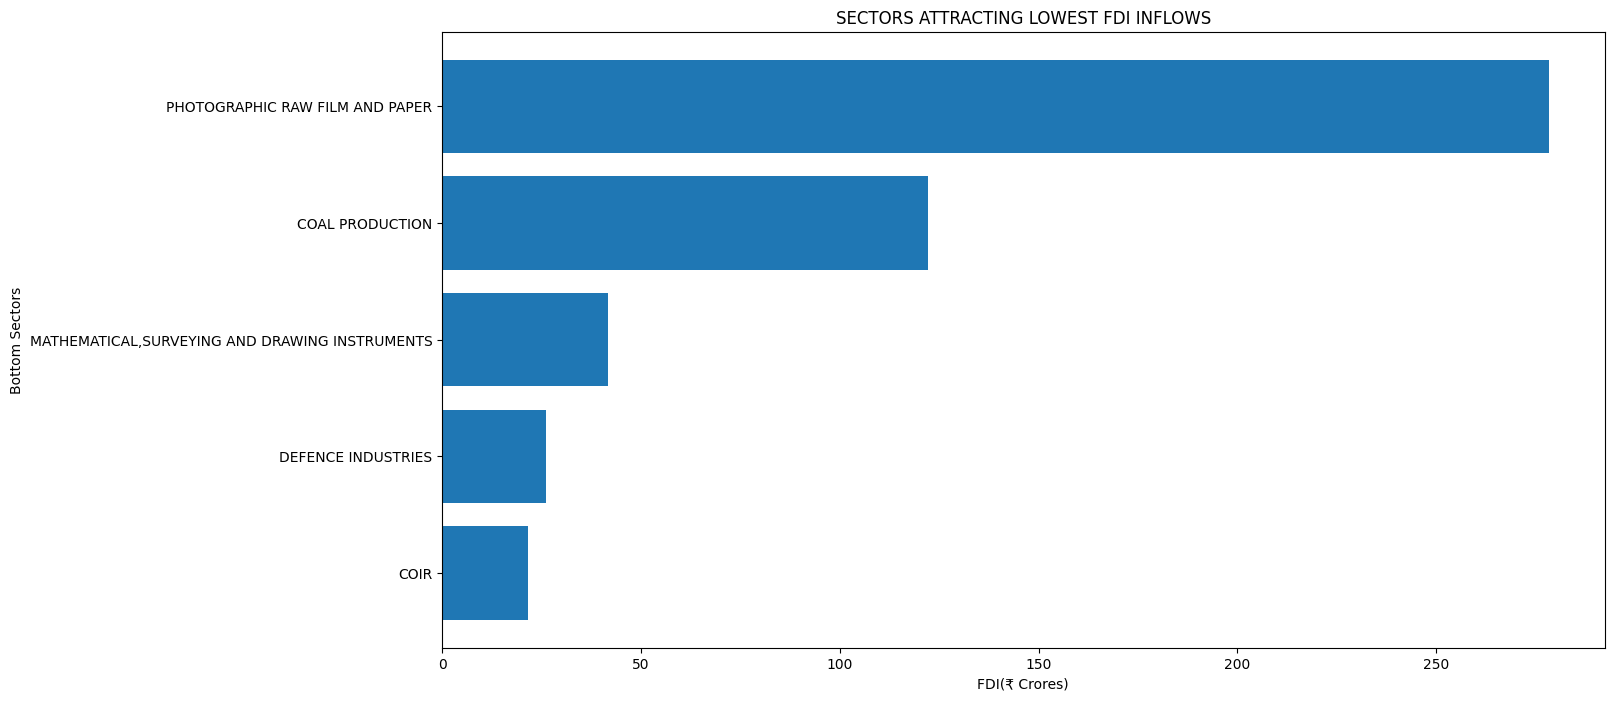

In [94]:
#Creating bar chart to visualise Total FDI inflow in Bottom 5 sectors using Matplotlib

plt.figure(figsize=(15,8))
plt.barh(Bottom_5_Sectors.index,Bottom_5_Sectors['FDI(₹ Crores)'])
plt.title('SECTORS ATTRACTING LOWEST FDI INFLOWS')
plt.xlabel('FDI(₹ Crores)')
plt.ylabel('Bottom Sectors')
plt.show()

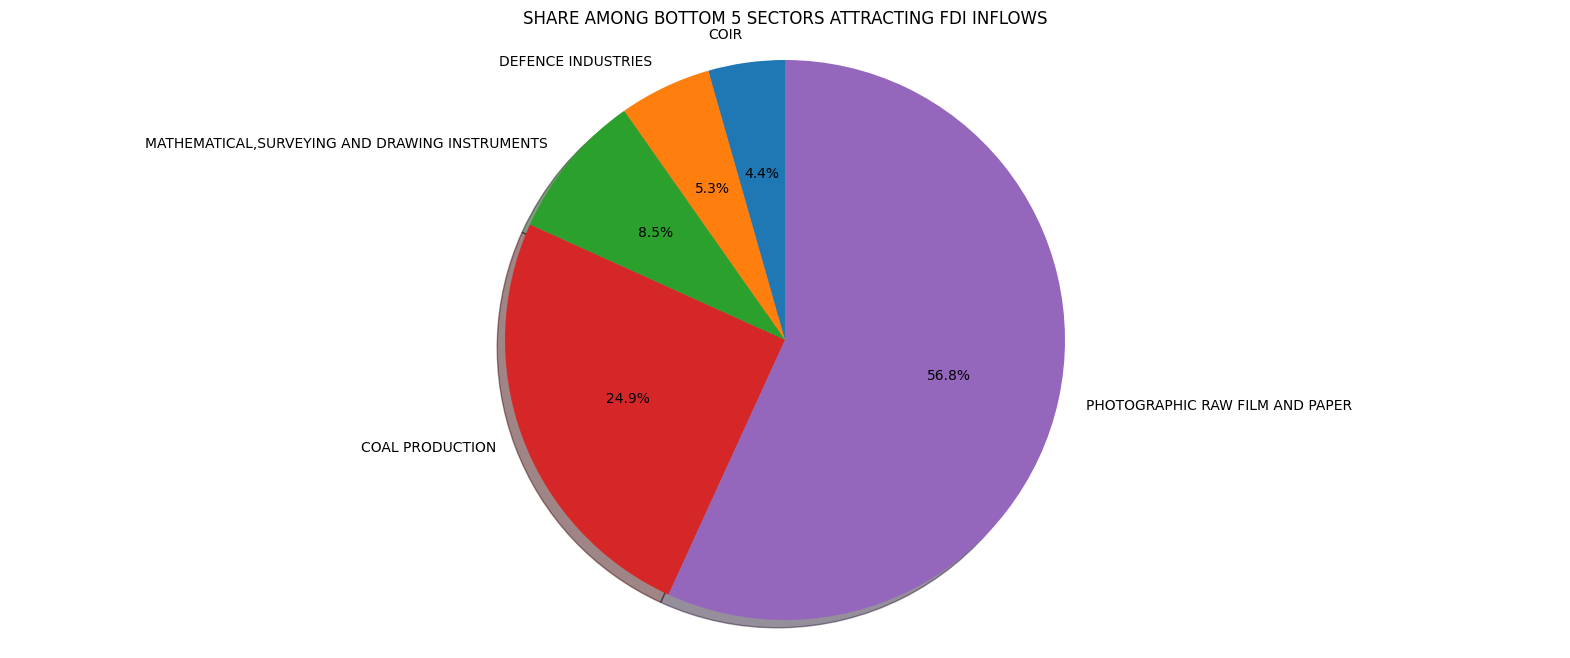

In [95]:
#Creating pie chart to visualise percentage share of FDI among top 10 sectors using Matplotlib

plt.figure(figsize=(20,8))
plt.pie(Bottom_5_Sectors['FDI(₹ Crores)'],labels=Bottom_5_Sectors.index,autopct='%1.1f%%',shadow=True,startangle=90)
plt.axis('equal')
plt.title('SHARE AMONG BOTTOM 5 SECTORS ATTRACTING FDI INFLOWS')
plt.show()

Among Bottom 5 sectors, Coir has the lowest FDI of ₹21.64Cr having only 4.4% share among bottom 5 sectors and among all it has only 0.001208%.

# **Year-wise Details:**
### **Year-wise FDI Inflow**

In [96]:
#Creating Dataframe
melt02 = melt01[['Year', 'FDI(₹ Crores)']]
melt02=round(melt02.groupby('Year').sum(),2)

In [97]:
#reating new column of % growth over previous year
melt02['% growth over previous year'] = round(melt02.pct_change()*100,2)

In [98]:
print('\n'+"*"*8+"Details on Variation of FDI INFLOW Year-wise"+'*'*8) #Year-wise FDI Inflow
melt02.fillna('-')


********Details on Variation of FDI INFLOW Year-wise********


,FDI(₹ Crores),% growth over previous year
Year,,
2000-01,10865.97,-
2001-02,19208.02,76.77
2002-03,13086.22,-31.87
2003-04,10053.15,-23.18
2004-05,14461.59,43.85
2005-06,24524.51,69.58
2006-07,56512.74,130.43
2007-08,98940.57,75.08
2008-09,144390.03,45.94


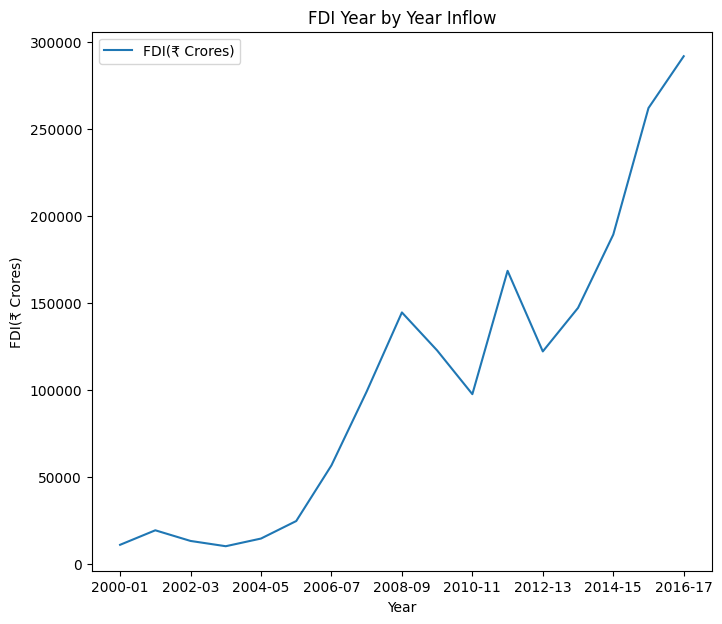

In [103]:
#plotting to show Year by Year FDI Inflow
melt02.plot.line(y='FDI(₹ Crores)',figsize=(8,7))
plt.ylabel('FDI(₹ Crores)')
plt.title('FDI Year by Year Inflow')
plt.show()

**The above graph shows the total amount of FDI inflows in India during the last 17 years i.e. 2000 to 2017.**

The FDI inflow from 2000-2001 i.e. ₹10865.97Cr. in 2001-02 it was ₹19208.02Cr. It shows the Good result in the FDI inflows in India. Little bit ups and downs in FDI inflows up to 2005-06, but after that great hike in the year 2007-08 and FDI was ₹98940.57Cr. In 2008-2009 there was a huge investment in FDI in ₹144390.03Cr. But then there was a downfall in Inflow of FDI in two consecutive years 2009-2010 and 2010-2011, with figures 122558.27 and 97421.29 respectively. We can analysis from the graph that in the year 2011-2012 the inflow of FDI was second highest of last 15 years i.e. 168298.80.Year 2012-13 and 2013-14 the FDI inflow fluctuated from 121984.32 to 147010.90respectively. In last Financial Year i.e.2016-2017 the amount of FDI Inflow were ₹291608.67Cr which is the highest FDI inflow in last 17 years.

# **Conclusion:**

In [100]:
Sectorwise_fdi['Year'] = '2000-17'  #Creating a new column with year 2000-17 in Sectorwise_fdi Dataframe

In [101]:
Sectorwise_fdi = Sectorwise_fdi[['Year','FDI(₹ Crores)', 'FDI(US$ Million)']]
Sectorwise_fdi['% of Total Inflows'] = (Sectorwise_fdi['FDI(₹ Crores)']/ Sectorwise_fdi['FDI(₹ Crores)'].sum())*100

<ipython-input-101-ea04063e1be3>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Sectorwise_fdi['% of Total Inflows'] = (Sectorwise_fdi['FDI(₹ Crores)']/ Sectorwise_fdi['FDI(₹ Crores)'].sum())*100


In [102]:
Sort_val1 = Sectorwise_fdi.sort_values('FDI(₹ Crores)',ascending=False)
Sort_val= Sort_val1.style.set_caption("SECTOR-WISE FDI INFLOWS").format(precision=3)
Sort_val

,Year,FDI(₹ Crores),FDI(US$ Million),% of Total Inflows
Sector,,,,
SERVICES SECTOR,2000-17,316347.590,59476.490,17.655
COMPUTER SOFTWARE & HARDWARE,2000-17,137276.820,24669.490,7.661
TELECOMMUNICATIONS,2000-17,130966.040,23946.010,7.309
CONSTRUCTION DEVELOPMENT,2000-17,115185.970,24293.090,6.428
AUTOMOBILE INDUSTRY,2000-17,92622.660,16673.920,5.169
TRADING,2000-17,84487.830,14210.880,4.715
DRUGS & PHARMACEUTICALS,2000-17,76377.640,14706.900,4.262
CHEMICALS (OTHER THAN FERTILIZERS),2000-17,70031.180,13293.090,3.908
POWER,2000-17,60397.970,11589.130,3.371


The Sectoral composition of FDI over the period of April 2000 to June 2017, we can find that the largest recipient of such investment is service sector (Financial and non-financial services). The share of this sector in FDI flows is 17 % of the inflow total foreign direct investment.**bold text**